## 泰坦尼克存活预测

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager as fm
import math

## 读取数据集

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/gender_submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 数据分析

In [4]:
train = train.drop('PassengerId',axis=1)  #ID没有什么预测意义
test = test.drop('PassengerId',axis=1)
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 船票等级p-class很重要！！！

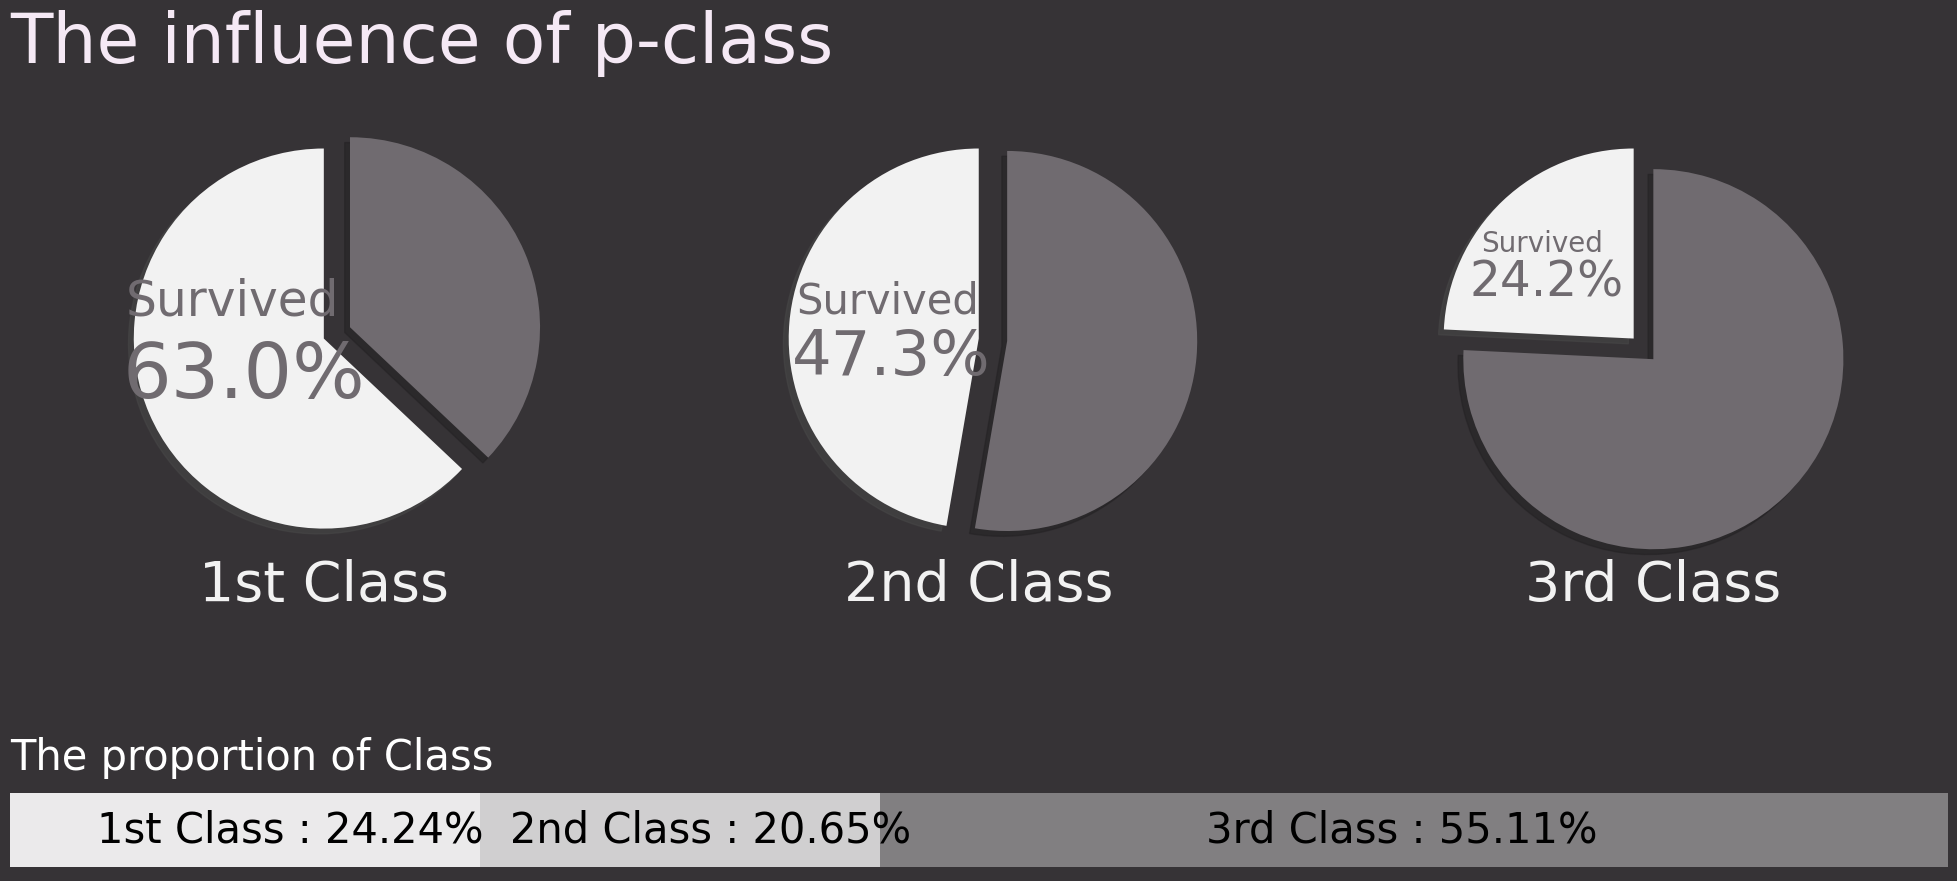

In [5]:
total = dict(train['Pclass'].value_counts())
survived = dict(train.groupby('Pclass')['Survived'].sum())

explode = (0, 0.15)

fig, ax = plt.subplots(figsize=(25,10),facecolor="#363336")
ax.patch.set_facecolor('#363336')

spec = gridspec.GridSpec(ncols=12, nrows=8, figure=fig)
ax1 = fig.add_subplot(spec[:5, :4],facecolor="#363336")
ax2 = fig.add_subplot(spec[:5, 4:8],facecolor="#363336")
ax3 = fig.add_subplot(spec[:5, 8:],facecolor="#363336")
ax4 = fig.add_subplot(spec[7:, :],facecolor="#363336")


ax1.pie([survived[1],total[1]-survived[1]], explode=explode, shadow=True, startangle=90, colors =['#F2F2F2','#706B70'])
ax2.pie([survived[2],total[2]-survived[2]], explode=explode, shadow=True, startangle=90, colors =['#F2F2F2','#706B70'])
ax3.pie([survived[3],total[3]-survived[3]], explode=explode, shadow=True, startangle=90, colors =['#F2F2F2','#706B70'])

ax1.text(s="Survived",x=-0.48,y=0.2,fontsize=35,va='center',ha='center',color='#706B70')
ax1.text(s=f"{round(survived[1]/total[1] * 100,1)}%",x=-0.42,y=-0.2, fontsize=55,va='center',ha='center',color='#706B70')
ax1.text(s="1st Class",x=0,y=-1.3, fontsize=40,va='center',ha='center',color='#F2F2F2')


ax2.text(s="Survived",x=-0.48,y=0.2,fontsize=30,va='center',ha='center',color='#706B70')
ax2.text(s=f"{round(survived[2]/total[2] * 100,1)}%",x=-0.46,y=-0.1, fontsize=45,va='center',ha='center',color='#706B70')
ax2.text(s="2nd Class",x=0,y=-1.3, fontsize=40,va='center',ha='center',color='#F2F2F2')

ax3.text(s="Survived",x=-0.48,y=0.5,fontsize=20,va='center',ha='center',color='#706B70')
ax3.text(s=f"{round(survived[3]/total[3] * 100,1)}%",x=-0.46,y=0.3, fontsize=35,va='center',ha='center',color='#706B70')
ax3.text(s="3rd Class",x=0.1,y=-1.3, fontsize=40,va='center',ha='center',color='#F2F2F2')

ax4.barh(y=0, width=sum(total.values()), color = '#F2F2F2', alpha=0.4)
ax4.barh(y=0, width=total[1], color = '#F2F2F2', alpha=0.8)
ax4.barh(y=0, width=total[1] + total[2], color = '#F2F2F2', alpha=0.7)

ax4.text(s=f"3rd Class : {round(total[3]/sum(total.values()) * 100,2)}%", x = 550, y = 0,  fontsize=30,va='center')
ax4.text(s=f"2nd Class : {round(total[2]/sum(total.values()) * 100,2)}%", x = 230, y = 0,  fontsize=30,va='center')
ax4.text(s=f"1st Class : {round(total[1]/sum(total.values()) * 100,2)}%", x = 40, y = 0, fontsize=30,va='center')

ax4.text(s="The proportion of Class", x = 0, y =1, fontsize=30, color ='white',va='top')


ax.axis("off")
ax4.axis("off")
ax4.set_xlim(0,sum(total.values()))
ax.text(s="The influence of p-class", x= 0,y=1.05, color='#F5E9F5',fontsize=50)
plt.show()

In [6]:
def change_name(name):
    if "Mr." in name: return "Mr"
    elif "Mrs." in name: return "Mrs"
    elif "Miss." in name: return "Miss"
    elif "Master." in name: return "Master"
    elif "Ms.": return "Ms"
    else: return "No"
train['Name'] = train['Name'].apply(change_name)
test['Name'] = test['Name'].apply(change_name)

## 原来名字也会有影响？？？

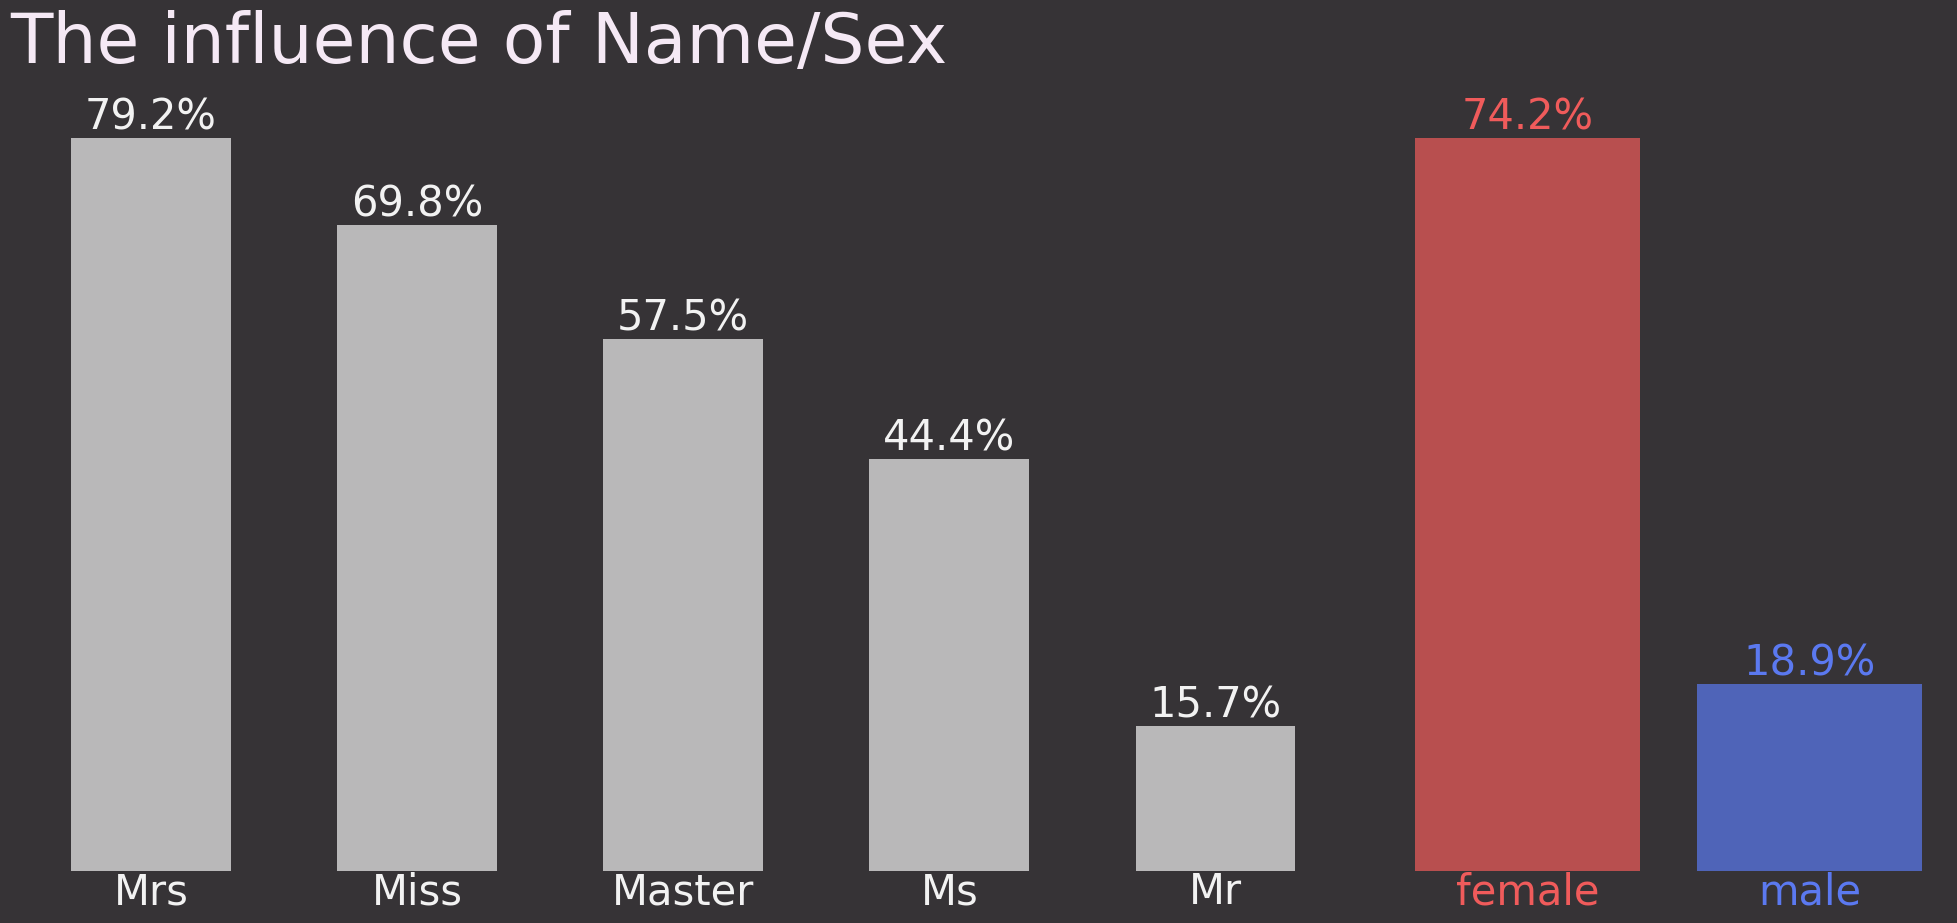

In [8]:
name = train.groupby('Name')['Survived'].mean()
name = sorted([*name.items()], key = lambda x : x[1], reverse=True)

sex = train.groupby('Sex')['Survived'].mean()
sex = sorted([*sex.items()], key = lambda x : x[1], reverse=True)

total = dict(train['Pclass'].value_counts())
survived = dict(train.groupby('Pclass')['Survived'].sum())

fig, ax = plt.subplots(figsize=(25,10),facecolor="#363336")
ax.patch.set_facecolor('#363336')

spec = gridspec.GridSpec(ncols=10, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[:, :7],facecolor="#363336")
ax2 = fig.add_subplot(spec[:, 7:],facecolor="#363336")

ax1.bar(x = [*map(lambda x : x[0], name)], height = [*map(lambda x : x[1], name)], width=0.6,color = "#F2F2F2",alpha=0.7)
for i,v in enumerate([*map(lambda x : x[0], name)]):
    ax1.text(s=v, x=i, y=0, va='top',ha='center', color ='#F2F2F2',fontsize=30)
for i,v in enumerate([*map(lambda x : x[1], name)]):
    ax1.text(s=f"{round(v*100,1)}%", x=i, y=v, va='bottom',ha='center', color ='#F2F2F2',fontsize=30)

ax1.axis("off")
ax2.axis("off")

x_pos = [0,0.5]
ax2.bar(x = x_pos, height = [*map(lambda x : x[1], sex)], width=0.4,color = ["#F05B5B",'#5B79F0'],alpha=0.7)
color = ["#F05B5B",'#5B79F0']

for i,v in enumerate([*map(lambda x : x[0], sex)]):
    ax2.text(s=v, x=x_pos[i], y=0, va='top',ha='center', color =color[i],fontsize=30)
for i,v in enumerate([*map(lambda x : x[1], sex)]):
    ax2.text(s=f"{round(v*100,1)}%", x=x_pos[i], y=v, va='bottom',ha='center', color =color[i],fontsize=30)

ax.text(s="The influence of Name/Sex ", x= 0,y=1.05,color='#F5E9F5',fontsize=50)
ax.axis('off')

plt.show()

## 年龄同样重要

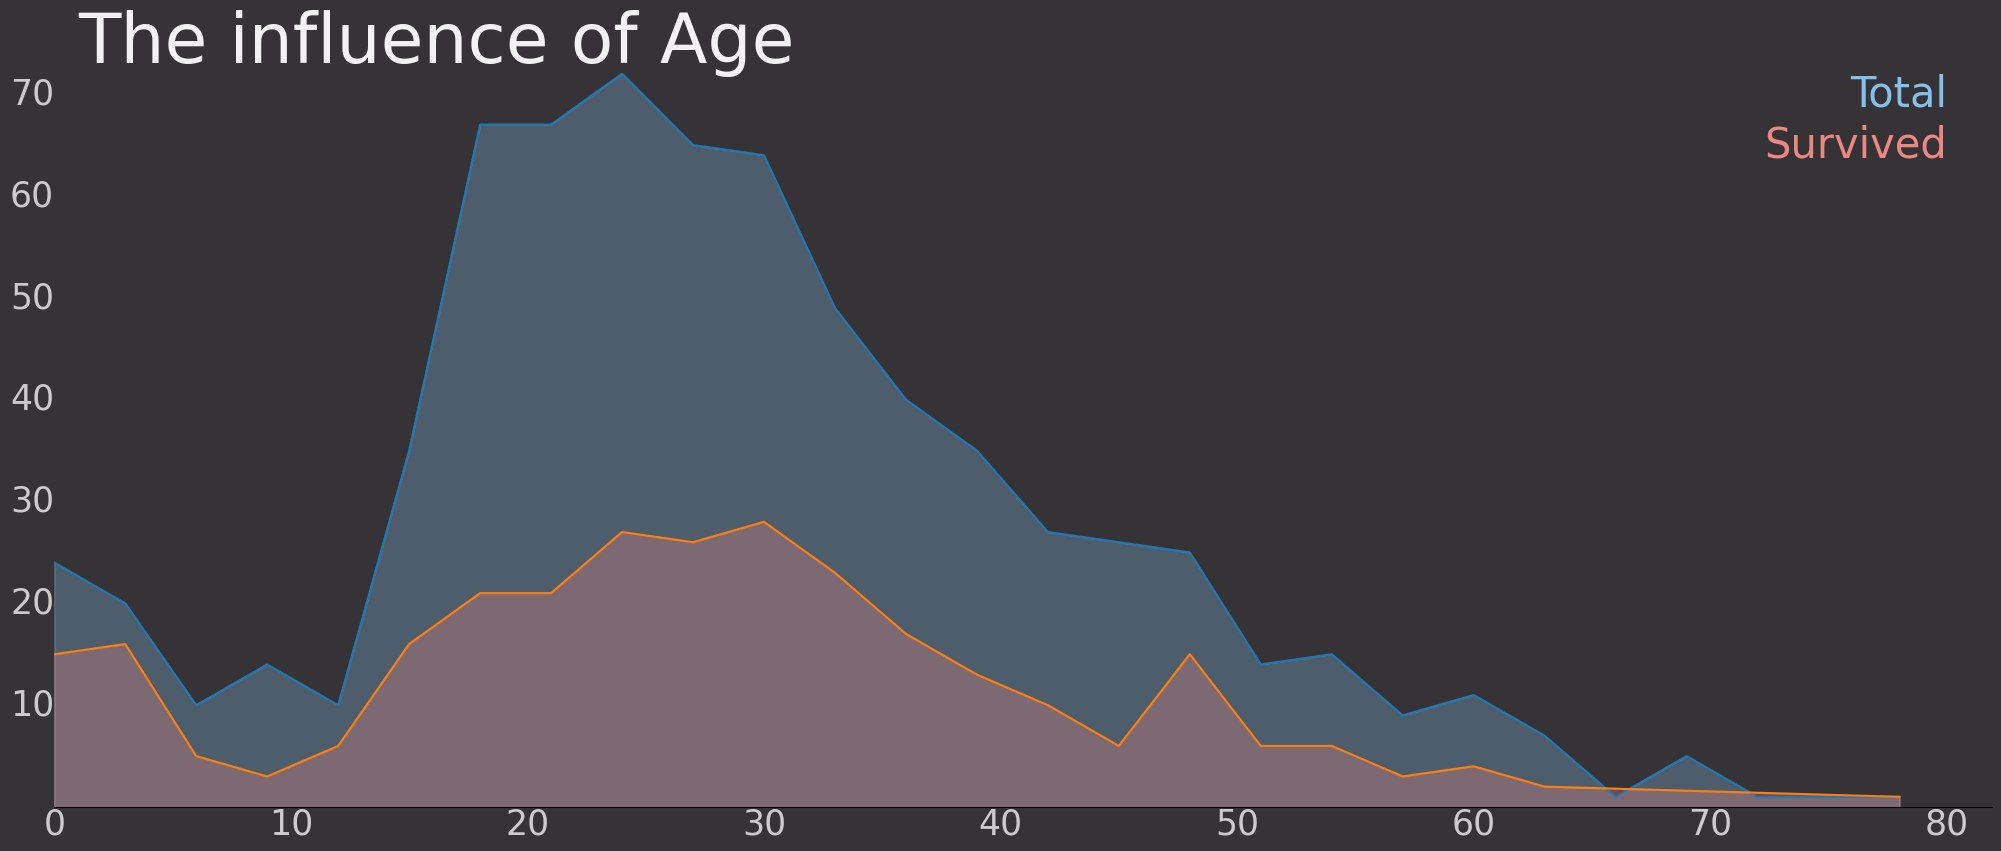

In [12]:
age_total = dict(train['Age'].value_counts())
age_total = sorted(age_total.items(), key=lambda x : x[0])
tmp = [*map(lambda x: x[0]//3 *3,age_total)]

age_tmp = {}
for a,b in zip(tmp, [*map(lambda x : x[1], age_total)]):
    if a in age_tmp.keys():
        age_tmp[a] +=b
    else:
        age_tmp[a]=b

age_survived = dict(train[train['Survived']==1]['Age'].value_counts())
age_survived = sorted(age_survived.items(), key=lambda x : x[0])
tmp = [*map(lambda x: x[0]//3 *3,age_survived)]

age_tmp_s = {}
for a,b in zip(tmp, [*map(lambda x : x[1], age_survived)]):
    if a in age_tmp_s.keys():
        age_tmp_s[a] +=b
    else:
        age_tmp_s[a]=b
    
fig, ax = plt.subplots(figsize=(25,10),facecolor="#363336")
ax.patch.set_facecolor('#363336')

spec = gridspec.GridSpec(ncols=10, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[:, :],facecolor="#363336")

ax1.plot([*map(lambda x : x[0], age_tmp.items())],[*map(lambda x : x[1], age_tmp.items())])
ax1.fill_between([*map(lambda x : x[0], age_tmp.items())], 0, [*map(lambda x : x[1], age_tmp.items())], color='#85C0EA',alpha=0.3)
ax1.plot([*map(lambda x : x[0], age_tmp_s.items())],[*map(lambda x : x[1], age_tmp_s.items())])
ax1.fill_between([*map(lambda x : x[0], age_tmp_s.items())], 0, [*map(lambda x : x[1], age_tmp_s.items())], color='#EA8881',alpha=0.3)
ax1.set_xlim(0,)
ax1.set_ylim(0,)
ax1.text(s="Total", x=80,y=70,fontsize=30, color='#85C0EA',va='center',ha='right')
ax1.text(s="Survived", x=80,y=65,fontsize=30, color='#EA8881',va='center',ha='right')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax.axis("off")
ax1.set_xticks([])
ax1.set_yticks([])
for i in range(0, 81,10):
    ax1.text(s=i, x=i, y=0,  fontsize=25, color = "#F2F2F2",va='top',ha='center',alpha=0.8)
for i in range(10, 80,10):
    ax1.text(s=i, x=0, y=i,  fontsize=25, color = "#F2F2F2",va='center',ha='right',alpha=0.8)

ax1.text(s="The influence of Age", x=1, y=75, fontsize=50, color = "#F2F2F2", va='center', ha='left')

plt.show()

## 缺失值NAN值处理

In [13]:
print("train 'Age' colunms's NaN : ",train['Age'].isnull().sum())
print("test 'Age' colunms's NaN : ",test['Age'].isnull().sum())

train[train['Age'].isnull()]['Name'].value_counts()

train 'Age' colunms's NaN :  177
test 'Age' colunms's NaN :  86


Mr        119
Miss       36
Mrs        17
Master      4
Ms          1
Name: Name, dtype: int64

In [14]:
median_value = dict(train.groupby('Name')['Age'].median())
train['Age'] = train.apply(lambda x : int(median_value[x.Name]) if math.isnan(x.Age) else int(x.Age) ,axis=1)
test['Age'] = test.apply(lambda x : int(median_value[x.Name]) if math.isnan(x.Age) else int(x.Age) ,axis=1)

In [15]:
train = train.drop('Ticket',axis=1)
test = test.drop('Ticket',axis=1)

In [16]:
train['Fare'] = train['Fare'].apply(lambda x : 100 if x >= 100 else x)
test['Fare'] = test['Fare'].apply(lambda x : 100 if x >= 100 else x)

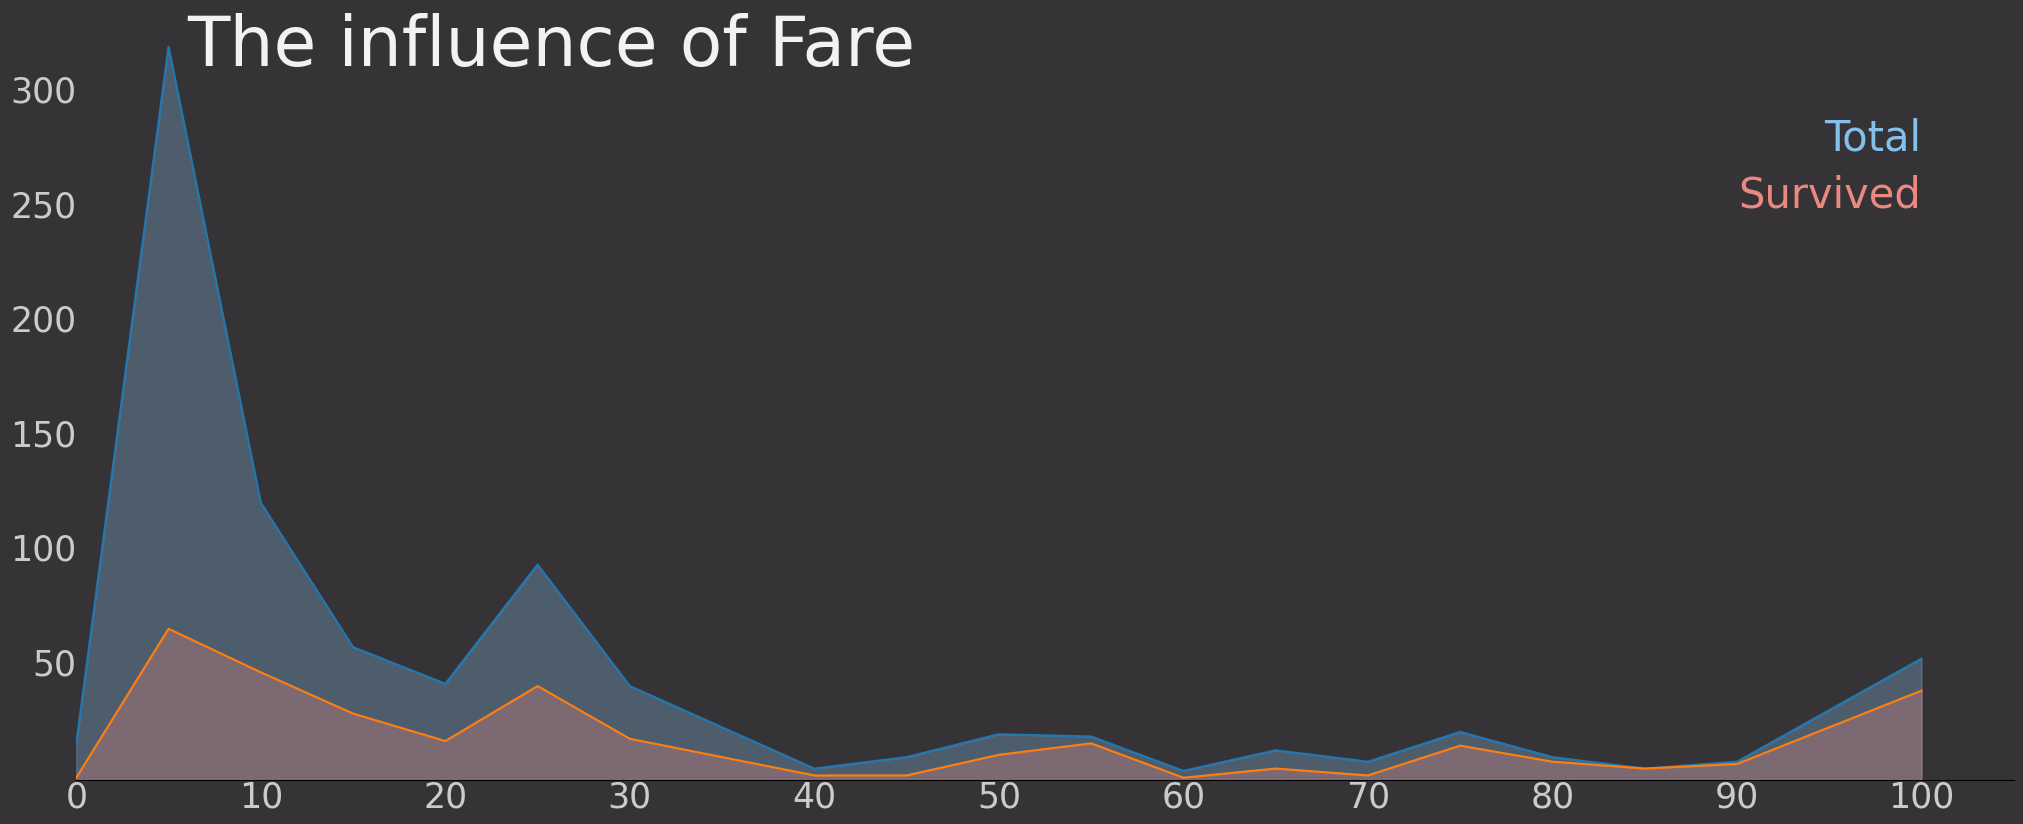

In [17]:
fare_total = dict(train['Fare'].value_counts())
fare_total = sorted(fare_total.items(), key=lambda x : x[0])
tmp = [*map(lambda x: x[0]//5 *5,fare_total)]

fare_tmp = {}
for a,b in zip(tmp, [*map(lambda x : x[1], fare_total)]):
    if a in fare_tmp.keys():
        fare_tmp[a] +=b
    else:
        fare_tmp[a]=b

fare_survived = dict(train[train['Survived']==1]['Fare'].value_counts())
fare_survived = sorted(fare_survived.items(), key=lambda x : x[0])
tmp = [*map(lambda x: x[0]//5 *5,fare_survived)]

fare_tmp_s = {}
for a,b in zip(tmp, [*map(lambda x : x[1], fare_survived)]):
    if a in fare_tmp_s.keys():
        fare_tmp_s[a] +=b
    else:
        fare_tmp_s[a]=b
    
fig, ax = plt.subplots(figsize=(25,10),facecolor="#363336")
ax.patch.set_facecolor('#363336')

spec = gridspec.GridSpec(ncols=10, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[:, :],facecolor="#363336")

ax1.plot([*map(lambda x : x[0], fare_tmp.items())],[*map(lambda x : x[1], fare_tmp.items())])
ax1.fill_between([*map(lambda x : x[0], fare_tmp.items())], 0, [*map(lambda x : x[1], fare_tmp.items())], color='#85C0EA',alpha=0.3)
ax1.plot([*map(lambda x : x[0], fare_tmp_s.items())],[*map(lambda x : x[1], fare_tmp_s.items())])
ax1.fill_between([*map(lambda x : x[0], fare_tmp_s.items())], 0, [*map(lambda x : x[1], fare_tmp_s.items())], color='#EA8881',alpha=0.3)
ax1.set_xlim(0,)
ax1.set_ylim(0,)
ax1.text(s="Total", x=100,y=280,fontsize=30, color='#85C0EA',va='center',ha='right')
ax1.text(s="Survived", x=100,y=255,fontsize=30, color='#EA8881',va='center',ha='right')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax.axis("off")
ax1.set_xticks([])
ax1.set_yticks([])
for i in range(0, 101,10):
    ax1.text(s=i, x=i, y=0, fontsize=25, color = "#F2F2F2",va='top',ha='center',alpha=0.8)
for i in range(50, 350,50):
    ax1.text(s=i, x=0, y=i, fontsize=25, color = "#F2F2F2",va='center',ha='right',alpha=0.8)

ax1.text(s="The influence of Fare", x=6, y=320,fontsize=50, color = "#F2F2F2", va='center', ha='left')

plt.show()

## 直观感觉船体损坏时船舱的位置也很影响，但是缺失值太多了

In [18]:
print("Cabin's NaN value : ",train['Cabin'].isnull().sum())
print("Cabin's NaN percent : ",round(train['Cabin'].isnull().sum()/len(train['Cabin'])*100,2), "%")

train = train.drop("Cabin", axis=1)
test = test.drop("Cabin", axis=1)

Cabin's NaN value :  687
Cabin's NaN percent :  77.1 %


## 数据预处理，获得训练集与测试集

In [19]:
train = pd.get_dummies(train,columns=['Pclass','Name','Sex','Embarked'],drop_first=True)
test = pd.get_dummies(test,columns=['Pclass','Name','Sex','Embarked'],drop_first=True)
train.head(3)

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Name_Miss,Name_Mr,Name_Mrs,Name_Ms,Sex_male,Embarked_Q,Embarked_S
0,0,22,1,0,7.2500,0,1,0,1,0,0,1,0,1
1,1,38,1,0,71.2833,0,0,0,0,1,0,0,0,0
2,1,26,0,0,7.9250,0,1,1,0,0,0,0,0,1


In [20]:
y = train['Survived']
X = train.drop('Survived',axis=1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

In [22]:
X.shape #训练集

(891, 13)

In [23]:
test.shape

(418, 13)

## 建立模型

In [24]:
import torch
import torch.nn as nn
from torch import optim

from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.utils.data.dataset import random_split

torch.manual_seed(100)


In [25]:
X = torch.tensor(X,dtype=torch.float32)
y = torch.tensor(y,dtype = torch.float32)
test = torch.tensor(test,dtype=torch.float32)
y = y.reshape(-1,1)

dataset = TensorDataset(X, y)
train_dataset, val_dataset = random_split(dataset, [713,178])
train_dataset = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_dataset = DataLoader(val_dataset, batch_size=1, shuffle=True)

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [27]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(13, 13)
        self.dropout1 = nn.Dropout(0.1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(13, 13)
        self.dropout2 = nn.Dropout(0.1)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(13, 10)
        self.dropout3 = nn.Dropout(0.1)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(10, 5)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(5, 1)
        self.sigmoid1 = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.dropout3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.sigmoid1(x)
        return x

In [28]:
model=MLP()

In [29]:
model

MLP(
  (fc1): Linear(in_features=13, out_features=13, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (relu1): ReLU()
  (fc2): Linear(in_features=13, out_features=13, bias=True)
  (dropout2): Dropout(p=0.1, inplace=False)
  (relu2): ReLU()
  (fc3): Linear(in_features=13, out_features=10, bias=True)
  (dropout3): Dropout(p=0.1, inplace=False)
  (relu3): ReLU()
  (fc4): Linear(in_features=10, out_features=5, bias=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid1): Sigmoid()
)

## 训练模型

In [31]:
epochs=10
loss_fn = nn.BCELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [32]:
for epoch in range(epochs + 1):
    for batch_idx, samples in enumerate(train_dataset):
        x_train, y_train = samples
        optimizer.zero_grad()
        prediction = model(x_train)
        cost = loss_fn(prediction, y_train)
        cost.backward()
        optimizer.step()
        
        if batch_idx%250 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
                epoch, epochs, batch_idx+1, len(train_dataset),
                cost.item()
                ))
    validation_data_eval = []
    for batch_idx, samples in enumerate(val_dataset):
        x_train, y_train = samples
        prediction = model(x_train)
        cost = loss_fn(prediction, y_train)
        validation_data_eval.append(cost.item())
    print("validation cost : ", np.mean(validation_data_eval))

Epoch    0/10 Batch 1/713 Cost: 0.699903
Epoch    0/10 Batch 251/713 Cost: 0.435045
Epoch    0/10 Batch 501/713 Cost: 2.718178
validation cost :  0.5187028843616501
Epoch    1/10 Batch 1/713 Cost: 2.429654
Epoch    1/10 Batch 251/713 Cost: 0.818925
Epoch    1/10 Batch 501/713 Cost: 0.219099
validation cost :  0.5467927001542254
Epoch    2/10 Batch 1/713 Cost: 0.224563
Epoch    2/10 Batch 251/713 Cost: 0.071588
Epoch    2/10 Batch 501/713 Cost: 0.393232
validation cost :  1.9128102626163752
Epoch    3/10 Batch 1/713 Cost: 0.010374
Epoch    3/10 Batch 251/713 Cost: 0.146076
Epoch    3/10 Batch 501/713 Cost: 0.539933
validation cost :  0.5305887717023143
Epoch    4/10 Batch 1/713 Cost: 0.774144
Epoch    4/10 Batch 251/713 Cost: 0.009748
Epoch    4/10 Batch 501/713 Cost: 0.232350
validation cost :  0.5144508474355522
Epoch    5/10 Batch 1/713 Cost: 2.167941
Epoch    5/10 Batch 251/713 Cost: 0.124981
Epoch    5/10 Batch 501/713 Cost: 1.077967
validation cost :  0.617428738393643
Epoch    6/

In [33]:
pred = model(test)
pred = pd.DataFrame(pred.tolist())

pred[0] = pred[0].apply(lambda x : 1 if x>=0.5 else 0)

In [34]:
submission['Survived'] = pred
submission.to_csv("MLP_Submission_10.csv",index=None)